# Objetivos:
- Coletar informações das reclamações
- Extrair indicadores sobre principais motivos de reclamações


## Import

In [2]:
#pip install pandas selenium undetected-chromedriver
import pandas as pd
from selenium.webdriver.common.by import By # type: ignore
from selenium.webdriver.support.ui import WebDriverWait # type: ignore
from selenium.webdriver.support import expected_conditions as EC # type: ignore
import undetected_chromedriver as uc # type: ignore
from wordcloud import WordCloud
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import string
import nltk
from PIL import Image
import numpy as np

## Universidade 1

In [ ]:
page_start = 1
page_end = 50
LIST_COMPLAINTS = []
driver = uc.Chrome()

for page in range(page_start, page_end+1):

    driver.get(f'https://www.reclameaqui.com.br/empresa/estacio/lista-reclamacoes/?pagina={page}')

    complaints_full = WebDriverWait(driver,2).until(EC.presence_of_all_elements_located((By.XPATH, '//div[@class="sc-1pe7b5t-0 eJgBOc"]')))

    for complaints in complaints_full:
        content = {
            "Title": complaints.text.split('\n')[0],
            "Body": complaints.text.split('\n')[1],
            "Status": complaints.text.split('\n')[2],
            "Date": complaints.text.split('\n')[3]
                }
        
        LIST_COMPLAINTS.append(content)

In [ ]:
df = pd.DataFrame(LIST_COMPLAINTS)
df.shape

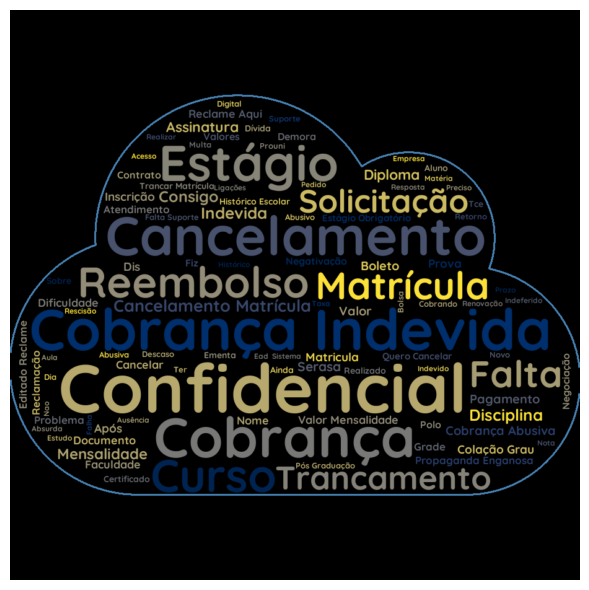

In [ ]:


font_path = "./Fonts/Quicksand-Bold.ttf"
stops = stopwords.words('portuguese')
# Baixando stop words do NLTK
#nltk.download('stopwords')

todo_texto = ' '.join(df['Title'].values).lower()
todo_texto = todo_texto.replace('estácio', 'confidencial').replace('estacio', 'confidencial')
# Criação de nova lista de palavras, removendo stop words
palavras_semstop = [p for p in todo_texto.split(' ') if p not in stops]

# Remoção da pontuação, gerando uma lista sem stop words e sem pontuação
palavras_sem_pontuacao = [p for p in palavras_semstop if p not in string.punctuation]

# Criação de nova lista de palavras, sem stopwords e pontuação
todo_texto = ' '.join(palavras_sem_pontuacao).strip().title()

# Carregar imagem e forçar branco/preto
img = Image.open('img/cloud.png').convert('L')
mask = np.array(img)

# Binarização: tudo acima de 10 vira branco (255), o resto preto (0)
mask_cloud = np.where(mask > 10, 255, 0).astype(np.uint8)

colormap = 'cividis'
# Usar no WordCloud
nuvem = WordCloud(
    background_color='black',
    mask=mask_cloud,
    colormap=colormap,
    contour_color='steelblue',
    contour_width=2,
    max_words=100,
    stopwords=stops,
    font_path=font_path,
    width=800,
    height=400
)

nuvem.generate(todo_texto)

plt.figure(figsize=(12, 6))
plt.imshow(nuvem, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
plt.show()

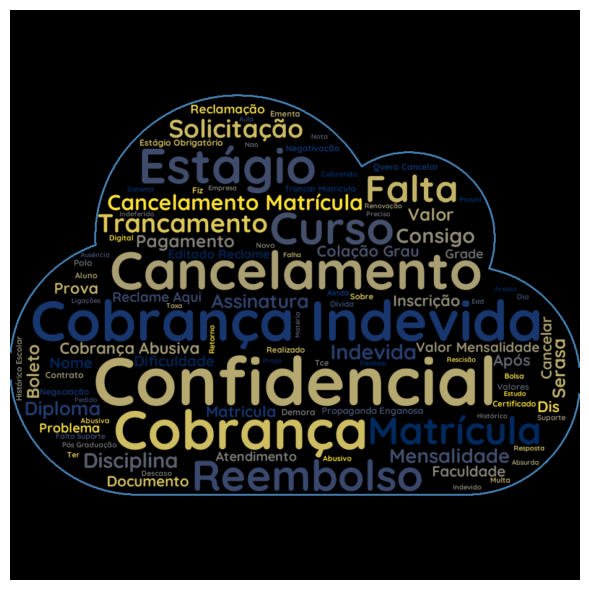

In [ ]:
# SEM OS PRINCIPAIS TERMOS

frequencia = nltk.FreqDist(palavras_sem_pontuacao)
# mais comuns

mais_comuns = frequencia.most_common(10)
# Extrair só as palavras
palavras_para_remover = [palavra for palavra, _ in mais_comuns]

# Combinar com as stopwords padrão
stopwords_personalizadas = set(stops).union(palavras_para_remover)

# Mapa de cores mais suave e legível
colormap = 'cividis'
# Usar no WordCloud
nuvem = WordCloud(
    background_color='black',
    mask=mask_cloud,
    colormap=colormap,
    contour_color='steelblue',
    contour_width=2,
    max_words=100,
    stopwords=stopwords_personalizadas,
    font_path=font_path,
    width=800,
    height=300
)

nuvem.generate(todo_texto)

plt.figure(figsize=(15, 6))
plt.imshow(nuvem, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
plt.show()

## Universidade 2

In [6]:
page_start = 1
page_end = 50
LIST_COMPLAINTS = []
driver = uc.Chrome()

for page in range(page_start, page_end+1):

    driver.get(f'https://www.reclameaqui.com.br/empresa/universidade-cruzeiro-do-sul/lista-reclamacoes/?pagina={page}')

    complaints_full = WebDriverWait(driver,600).until(EC.presence_of_all_elements_located((By.XPATH, '//div[@class="sc-1pe7b5t-0 eJgBOc"]')))

    for complaints in complaints_full:
        content = {
            "Title": complaints.text.split('\n')[0],
            "Body": complaints.text.split('\n')[1],
            "Status": complaints.text.split('\n')[2],
            "Date": complaints.text.split('\n')[3]
                }
        
        LIST_COMPLAINTS.append(content)

In [7]:
df = pd.DataFrame(LIST_COMPLAINTS)
df.shape

(500, 4)

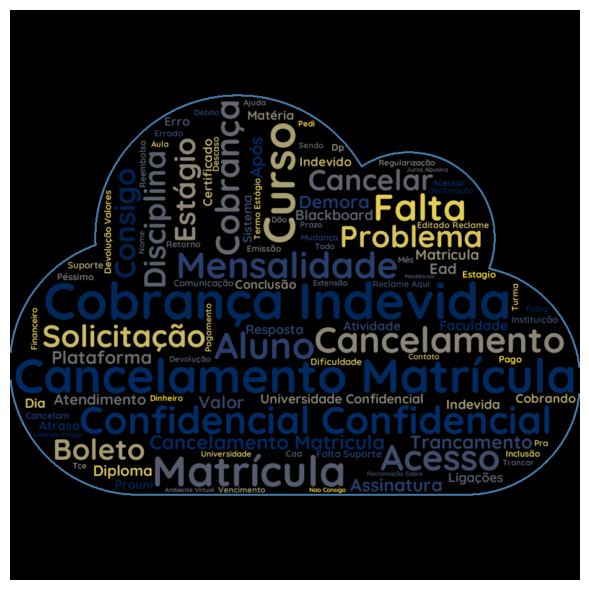

In [9]:


font_path = "./Fonts/Quicksand-Bold.ttf"
stops = stopwords.words('portuguese')
# Baixando stop words do NLTK
#nltk.download('stopwords')

todo_texto = ' '.join(df['Title'].values).lower()
todo_texto = todo_texto.replace('cruzeiro', 'confidencial').replace('sul', 'confidencial')
# Criação de nova lista de palavras, removendo stop words
palavras_semstop = [p for p in todo_texto.split(' ') if p not in stops]

# Remoção da pontuação, gerando uma lista sem stop words e sem pontuação
palavras_sem_pontuacao = [p for p in palavras_semstop if p not in string.punctuation]

# Criação de nova lista de palavras, sem stopwords e pontuação
todo_texto = ' '.join(palavras_sem_pontuacao).strip().title()

# Carregar imagem e forçar branco/preto
img = Image.open('img/cloud.png').convert('L')
mask = np.array(img)

# Binarização: tudo acima de 10 vira branco (255), o resto preto (0)
mask_cloud = np.where(mask > 10, 255, 0).astype(np.uint8)

colormap = 'cividis'
# Usar no WordCloud
nuvem = WordCloud(
    background_color='black',
    mask=mask_cloud,
    colormap=colormap,
    contour_color='steelblue',
    contour_width=2,
    max_words=100,
    stopwords=stops,
    font_path=font_path,
    width=800,
    height=400
)

nuvem.generate(todo_texto)

plt.figure(figsize=(12, 6))
plt.imshow(nuvem, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
plt.show()

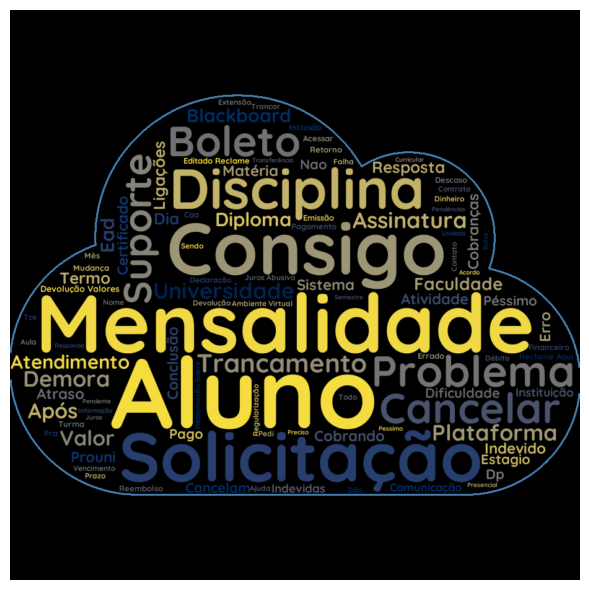

In [11]:
# SEM OS PRINCIPAIS TERMOS

frequencia = nltk.FreqDist(palavras_sem_pontuacao)
# mais comuns

mais_comuns = frequencia.most_common(10)
# Extrair só as palavras
palavras_para_remover = [palavra for palavra, _ in mais_comuns]

# Combinar com as stopwords padrão
stopwords_personalizadas = set(stops).union(palavras_para_remover)

# Mapa de cores mais suave e legível
colormap = 'cividis'
# Usar no WordCloud
nuvem = WordCloud(
    background_color='black',
    mask=mask_cloud,
    colormap=colormap,
    contour_color='steelblue',
    contour_width=2,
    max_words=100,
    stopwords=stopwords_personalizadas,
    font_path=font_path,
    width=800,
    height=300
)

nuvem.generate(todo_texto)

plt.figure(figsize=(15, 6))
plt.imshow(nuvem, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
plt.show()

## Universidade 3

In [12]:
page_start = 1
page_end = 50
LIST_COMPLAINTS = []
driver = uc.Chrome()

for page in range(page_start, page_end+1):

    driver.get(f'https://www.reclameaqui.com.br/empresa/anhanguera-uniderp-uniban/lista-reclamacoes/?pagina={page}')

    complaints_full = WebDriverWait(driver,600).until(EC.presence_of_all_elements_located((By.XPATH, '//div[@class="sc-1pe7b5t-0 eJgBOc"]')))

    for complaints in complaints_full:
        content = {
            "Title": complaints.text.split('\n')[0],
            "Body": complaints.text.split('\n')[1],
            "Status": complaints.text.split('\n')[2],
            "Date": complaints.text.split('\n')[3]
                }
        
        LIST_COMPLAINTS.append(content)

In [13]:
df = pd.DataFrame(LIST_COMPLAINTS)
df.shape

(500, 4)

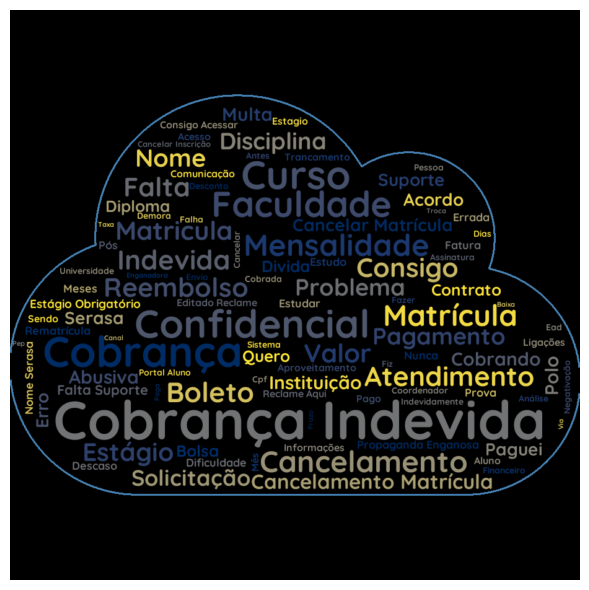

In [16]:


font_path = "./Fonts/Quicksand-Bold.ttf"
stops = stopwords.words('portuguese')
# Baixando stop words do NLTK
#nltk.download('stopwords')

todo_texto = ' '.join(df['Title'].values).lower()
todo_texto = todo_texto.replace('anhanguera', 'confidencial')
# Criação de nova lista de palavras, removendo stop words
palavras_semstop = [p for p in todo_texto.split(' ') if p not in stops]

# Remoção da pontuação, gerando uma lista sem stop words e sem pontuação
palavras_sem_pontuacao = [p for p in palavras_semstop if p not in string.punctuation]

# Criação de nova lista de palavras, sem stopwords e pontuação
todo_texto = ' '.join(palavras_sem_pontuacao).strip().title()

# Carregar imagem e forçar branco/preto
img = Image.open('img/cloud.png').convert('L')
mask = np.array(img)

# Binarização: tudo acima de 10 vira branco (255), o resto preto (0)
mask_cloud = np.where(mask > 10, 255, 0).astype(np.uint8)

colormap = 'cividis'
# Usar no WordCloud
nuvem = WordCloud(
    background_color='black',
    mask=mask_cloud,
    colormap=colormap,
    contour_color='steelblue',
    contour_width=2,
    max_words=100,
    stopwords=stops,
    font_path=font_path,
    width=800,
    height=400
)

nuvem.generate(todo_texto)

plt.figure(figsize=(12, 6))
plt.imshow(nuvem, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
plt.show()

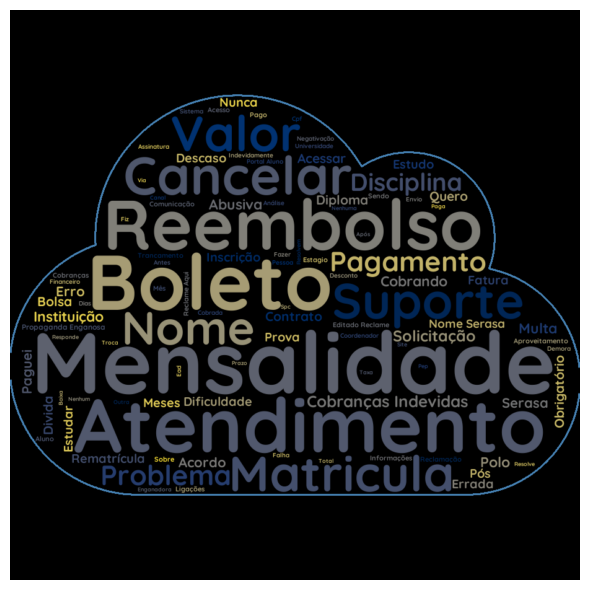

In [17]:
# SEM OS PRINCIPAIS TERMOS

frequencia = nltk.FreqDist(palavras_sem_pontuacao)
# mais comuns

mais_comuns = frequencia.most_common(10)
# Extrair só as palavras
palavras_para_remover = [palavra for palavra, _ in mais_comuns]

# Combinar com as stopwords padrão
stopwords_personalizadas = set(stops).union(palavras_para_remover)

# Mapa de cores mais suave e legível
colormap = 'cividis'
# Usar no WordCloud
nuvem = WordCloud(
    background_color='black',
    mask=mask_cloud,
    colormap=colormap,
    contour_color='steelblue',
    contour_width=2,
    max_words=100,
    stopwords=stopwords_personalizadas,
    font_path=font_path,
    width=800,
    height=300
)

nuvem.generate(todo_texto)

plt.figure(figsize=(15, 6))
plt.imshow(nuvem, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
plt.show()

## Universidade 4 (Gratuita)

In [3]:
page_start = 1
page_end = 20
LIST_COMPLAINTS = []
driver = uc.Chrome()

for page in range(page_start, page_end+1):

    driver.get(f'https://www.reclameaqui.com.br/empresa/faculdade-de-tecnologia-de-sao-paulo-fatec/lista-reclamacoes/?pagina={page}')

    complaints_full = WebDriverWait(driver,600).until(EC.presence_of_all_elements_located((By.XPATH, '//div[@class="sc-1pe7b5t-0 eJgBOc"]')))

    for complaints in complaints_full:
        content = {
            "Title": complaints.text.split('\n')[0],
            "Body": complaints.text.split('\n')[1],
            "Status": complaints.text.split('\n')[2],
            "Date": complaints.text.split('\n')[3]
                }
        
        LIST_COMPLAINTS.append(content)

In [4]:
df = pd.DataFrame(LIST_COMPLAINTS)
df.shape

(193, 4)

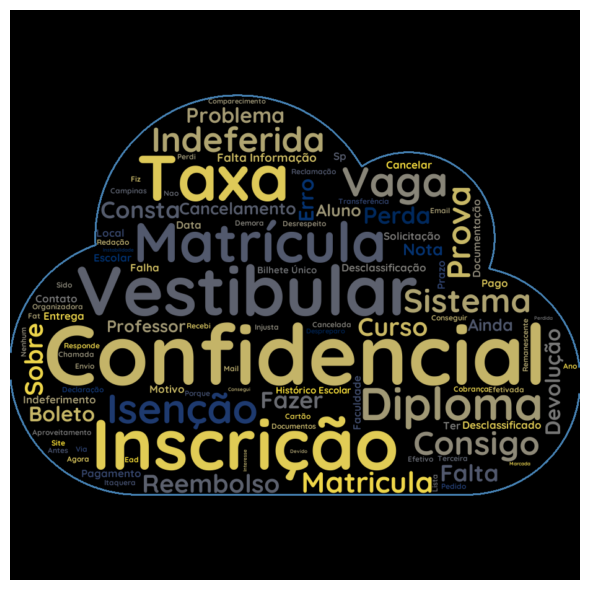

In [6]:


font_path = "./Fonts/Quicksand-Bold.ttf"
stops = stopwords.words('portuguese')
# Baixando stop words do NLTK
#nltk.download('stopwords')

todo_texto = ' '.join(df['Title'].values).lower()
todo_texto = todo_texto.replace('fatec', 'confidencial')
# Criação de nova lista de palavras, removendo stop words
palavras_semstop = [p for p in todo_texto.split(' ') if p not in stops]

# Remoção da pontuação, gerando uma lista sem stop words e sem pontuação
palavras_sem_pontuacao = [p for p in palavras_semstop if p not in string.punctuation]

# Criação de nova lista de palavras, sem stopwords e pontuação
todo_texto = ' '.join(palavras_sem_pontuacao).strip().title()

# Carregar imagem e forçar branco/preto
img = Image.open('img/cloud.png').convert('L')
mask = np.array(img)

# Binarização: tudo acima de 10 vira branco (255), o resto preto (0)
mask_cloud = np.where(mask > 10, 255, 0).astype(np.uint8)

colormap = 'cividis'
# Usar no WordCloud
nuvem = WordCloud(
    background_color='black',
    mask=mask_cloud,
    colormap=colormap,
    contour_color='steelblue',
    contour_width=2,
    max_words=100,
    stopwords=stops,
    font_path=font_path,
    width=800,
    height=400
)

nuvem.generate(todo_texto)

plt.figure(figsize=(12, 6))
plt.imshow(nuvem, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
plt.show()